In [1]:
%matplotlib inline


models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C))
models = (clf.fit(X, y) for clf in models)

[[-0.23101152  0.17328955]
 [-0.67983441  0.75652228]
 [ 0.08309794 -0.79275587]
 [ 0.38447708  1.77379816]
 [ 0.78344928  1.49492231]
 [ 0.20442192 -0.14167412]
 [-0.01872812  1.1774985 ]
 [-1.50067378  0.86371909]
 [ 1.41222749 -0.32593673]
 [ 0.01341546  0.29051436]
 [ 1.22099616  0.23401572]
 [-2.00074497 -0.01232974]
 [ 0.51309151 -0.47493144]
 [-1.23550238 -0.78675484]
 [ 1.33714554  0.85507537]
 [ 0.44667858  0.09095779]
 [-0.11620188 -0.02296347]
 [-1.05709622  0.98659465]
 [-0.16196684 -0.89902343]
 [-1.62266293 -0.13773573]
 [-0.63221245 -1.95778008]
 [-0.91987862  2.84168603]
 [-0.31281686 -0.54980078]
 [-0.83098584  1.43152019]
 [ 0.17385201 -0.04910575]
 [-0.88873369  0.56226219]
 [-0.22627784  0.48142972]
 [-0.33110705 -0.65909993]
 [-1.58027668 -1.41307915]
 [-0.45001709  1.02715546]
 [ 1.05888908 -0.8518702 ]
 [-0.83511246 -0.86691614]
 

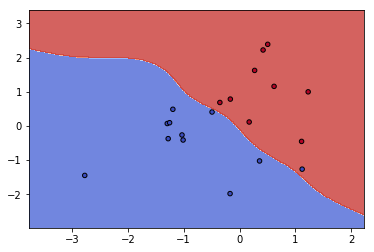

In [30]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import svm
import itertools


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    result = []
    for (i, j) in itertools.product(range(len(xx)), range(len(xx[0]))):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))
        
    Z = np.array(result).reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Take the first two features. We could avoid this by using a two-dim dataset

num_samples=50
num_features=2

samples = np.matrix(np.random.normal(size=num_samples * num_features).reshape(num_samples, num_features))
    
labels = 2 * (samples.sum(axis=1) > 0) - 1.0


C = 1  # SVM regularization parameter

trainer = svm.SVMTrainer(svm.Kernel.gaussian(0.7))
    
predictor = trainer.train(samples, labels)

# Set-up 2x2 grid for plotting.

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)


plot_contours(plt, predictor, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()
